In [1]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('SuperMarioBros..csv', sep = ',', encoding = 'latin-1')
del df['URL']

with pd.option_context('expand_frame_repr', False):
    print(df)

        Run ID   User ID          User Name            Category  Hours  Minutes  Seconds Platform ID Platform Name  Verified        Date
0     8yv634zo  qjn2k4jm            AndrewG                Any%    0.0      4.0   58.092    jm95z9ol           NES  verified  2014-03-25
1     0znkr8zn  qjn2k4jm            AndrewG            Warpless    0.0     19.0   12.330    jm95z9ol           NES  verified  2013-11-11
2     8yv688zo  kj96k7j4            Saradoc                Any%    0.0      4.0   57.693    jm95z9ol           NES  verified  2014-06-25
3     emk7ply6  dx35k6jl             Miqoou                Any%    0.0      5.0   11.000    jm95z9ol           NES  verified  2013-07-09
4     8m78n9z0  dx35k6jl             Miqoou            Warpless    0.0     21.0    3.000    jm95z9ol           NES  verified  2014-04-11
...        ...       ...                ...                 ...    ...      ...      ...         ...           ...       ...         ...
5870  yw8wl5ny  8e95dldj          bt_21_c

In [2]:
#Clean data

df = df.loc[(df['Category'] == 'Any%') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

           userName Category  Hours  Minutes  Seconds  TimeSeconds  \
161   Aaron Collins     Any%    0.0      5.0   25.000      325.000   
162       Cam Allen     Any%    0.0      5.0   17.000      317.000   
163   Scott Kessler     Any%    0.0      5.0   14.000      314.000   
164   Scott Kessler     Any%    0.0      5.0   11.000      311.000   
165   Scott Kessler     Any%    0.0      5.0   10.000      310.000   
...             ...      ...    ...      ...      ...          ...   
5858    KilleDragon     Any%    0.0      5.0   24.000      324.000   
5864      chi_galax     Any%    0.0      7.0    4.000      424.000   
5866        Oknytt1     Any%    0.0      5.0    2.383      302.383   
5871   ethanspitzer     Any%    0.0      5.0    6.000      306.000   
5873     SigNastyTV     Any%    0.0      5.0    5.000      305.000   

     Platform Name        Date  
161            NES  2002-06-25  
162            NES  2003-01-01  
163            NES  2004-01-01  
164            NES  2004-02

           userName Category  Hours  Minutes  Seconds  TimeSeconds  \
161   Aaron Collins     Any%    0.0      5.0   25.000      325.000   
162       Cam Allen     Any%    0.0      5.0   17.000      317.000   
163   Scott Kessler     Any%    0.0      5.0   14.000      314.000   
164   Scott Kessler     Any%    0.0      5.0   11.000      311.000   
165   Scott Kessler     Any%    0.0      5.0   10.000      310.000   
166   Trevor Seguin     Any%    0.0      5.0    7.000      307.000   
167   Trevor Seguin     Any%    0.0      5.0    6.000      306.000   
5316        AndrewG     Any%    0.0      5.0    6.000      306.000   
168   Scott Kessler     Any%    0.0      5.0    5.000      305.000   
169         AndrewG     Any%    0.0      5.0    0.600      300.600   
170         AndrewG     Any%    0.0      5.0    0.400      300.400   
171         AndrewG     Any%    0.0      4.0   59.400      299.400   
172         AndrewG     Any%    0.0      4.0   58.890      298.890   
173         AndrewG 

Text(0.5, 1.0, 'Super Mario Bros. Any% World Record Progression')

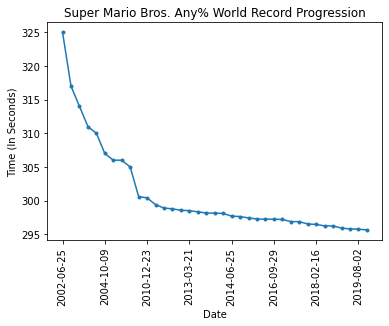

In [3]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Super Mario Bros. Any% World Record Progression")

In [4]:
#Print Leadboard

arr = []
names = []
rankings = df.sort_values(["Hours", "Minutes", "Seconds"])

for x in range(len(rankings)):
    if rankings.iloc[x].userName not in names:
        names.append(rankings.iloc[x].userName)
        arr.append(rankings.iloc[x])
        
rankings = pd.DataFrame(arr)
print("Leaderboard: ")
print (rankings)

Leaderboard: 
           userName Category  Hours  Minutes  Seconds  TimeSeconds  \
742           Mitch     Any%    0.0      0.0     28.0         28.0   
743          spades     Any%    0.0      0.0     29.0         29.0   
219         Runsaur     Any%    0.0      0.0     35.0         35.0   
79         LilKirbs     Any%    0.0      0.0     37.0         37.0   
560    Aaroncook467     Any%    0.0      0.0     37.0         37.0   
..              ...      ...    ...      ...      ...          ...   
217        YPlushes     Any%    1.0     15.0      4.0       4504.0   
156    TheGamerLand     Any%    1.0     15.0     23.0       4523.0   
126         Solietu     Any%    1.0     15.0     34.0       4534.0   
190         Viviana     Any%    2.0     32.0     40.0       9160.0   
299  lorenzokazooie     Any%    5.0      5.0     59.0      18359.0   

    Platform Name        Date  
742          WiiU  2018-07-23  
743          WiiU  2013-02-03  
219          WiiU  2018-03-09  
79           WiiU

     userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
4522  Niftski     Any%    0.0      4.0   58.375      298.375           NES   
4587  Niftski     Any%    0.0      4.0   57.959      297.959           NES   
4611  Niftski     Any%    0.0      4.0   57.660      297.660           NES   
4614  Niftski     Any%    0.0      4.0   57.277      297.277           NES   
4711  Niftski     Any%    0.0      4.0   57.211      297.211           NES   
4801  Niftski     Any%    0.0      4.0   56.878      296.878           NES   
4950  Niftski     Any%    0.0      4.0   56.545      296.545           NES   
5251  Niftski     Any%    0.0      4.0   56.129      296.129           NES   
5836  Niftski     Any%    0.0      4.0   55.846      295.846           NES   

            Date  
4522  2019-09-08  
4587  2019-10-03  
4611  2019-10-11  
4614  2019-10-12  
4711  2019-11-16  
4801  2019-12-20  
4950  2020-02-02  
5251  2020-04-04  
5836  2020-07-17  
     userName Category  Hours

Text(0.5, 1.0, "somewes's Progression")

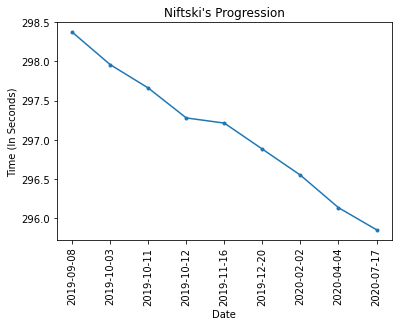

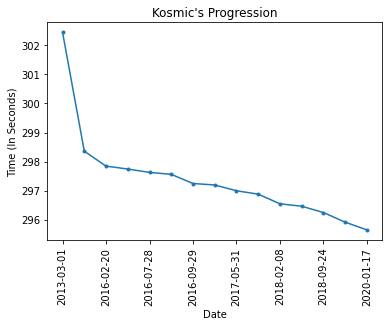

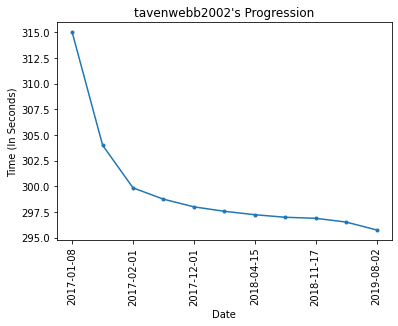

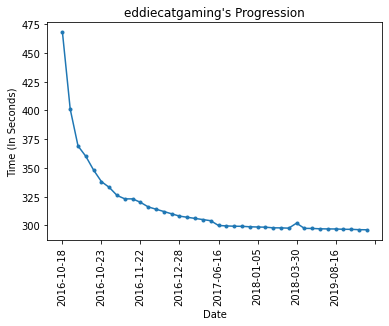

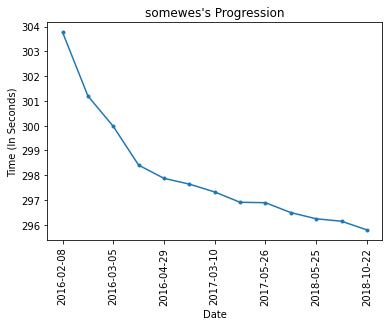

In [4]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Niftski']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Niftski's Progression")

wrhdf = df.loc[df['userName'] == 'Kosmic']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Kosmic's Progression")

wrhdf = df.loc[df['userName'] == 'tavenwebb2002']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("tavenwebb2002's Progression")

wrhdf = df.loc[df['userName'] == 'eddiecatgaming']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("eddiecatgaming's Progression")

wrhdf = df.loc[df['userName'] == 'somewes']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("somewes's Progression")

Text(0.5, 1.0, 'Super Mario World Platform Distribution')

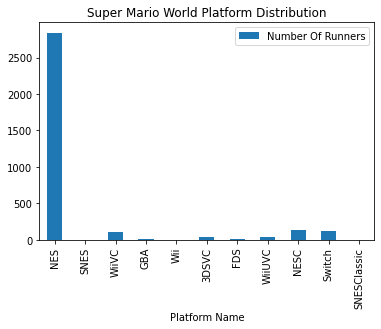

In [5]:
SNESCount = np.count_nonzero(df['Platform Name']=='SNES')
switchCount = np.count_nonzero(df['Platform Name']=='Switch')
wiiVCCount = np.count_nonzero(df['Platform Name']=='WiiVC')
ds3Count = np.count_nonzero(df['Platform Name']=='3DSVC')
wiiUVCCount = np.count_nonzero(df['Platform Name']=='WiiUVC')
SNESCCount = np.count_nonzero(df['Platform Name']=='SNESClassic')
NESCount = np.count_nonzero(df['Platform Name']=='NES')
GBACount = np.count_nonzero(df['Platform Name']=='GBA')
wiiCount = np.count_nonzero(df['Platform Name']=='Wii')
fdsCount = np.count_nonzero(df['Platform Name']=='FDS')
NESCCount = np.count_nonzero(df['Platform Name']=='NESClassic')

platformsArray = ([ ['NES', NESCount], ['SNES', SNESCount], ['WiiVC', wiiVCCount], ['GBA', GBACount], ['Wii', wiiCount], ['3DSVC', ds3Count], ['FDS', fdsCount], ['WiiUVC', wiiUVCCount], ['NESC', NESCCount], ['Switch', switchCount], ['SNESClassic', SNESCCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("Super Mario World Platform Distribution")

Text(0.5, 1.0, 'Super Mario Bros. Quantity of Runs by Year')

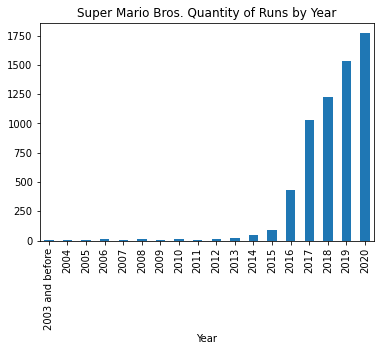

In [6]:
count2003 = np.count_nonzero(df['Date'] < '2004-01-01')
count2004 = np.count_nonzero(df['Date'] < '2005-01-01') - count2003
count2005 = np.count_nonzero(df['Date'] < '2006-01-01') - count2004
count2006 = np.count_nonzero(df['Date'] < '2007-01-01') - count2005
count2007 = np.count_nonzero(df['Date'] < '2008-01-01') - count2006
count2008 = np.count_nonzero(df['Date'] < '2009-01-01') - count2007
count2009 = np.count_nonzero(df['Date'] < '2010-01-01') - count2008
count2010 = np.count_nonzero(df['Date'] < '2011-01-01') - count2009
count2011 = np.count_nonzero(df['Date'] < '2012-01-01') - count2010
count2012 = np.count_nonzero(df['Date'] < '2013-01-01') - count2011
count2013 = np.count_nonzero(df['Date'] < '2014-01-01') - count2012
count2014 = np.count_nonzero(df['Date'] < '2015-01-01') - count2013
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2003 and before', count2003], ['2004', count2004], ['2005', count2005], ['2006', count2006], ['2007', count2007], ['2008', count2008], ['2009', count2009], ['2010', count2010], ['2011', count2011], ['2012', count2012], ['2013', count2013], ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Super Mario Bros. Quantity of Runs by Year")